In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

### Create dataset - voted centre hypothesis $ h_{S,v} $ 
S = 100, v = 3 

In [2]:
def sample_from_pH(nsamples=100):
    """ Generate random h by sampling 100 centers uniformly at random from [0,1]^2 with 
    100 corresponding labels sampled uniformly at random from {0,1}."""
    centers = np.random.uniform(0.0, 1.0, size = (nsamples,2))
    labels = np.random.choice([0,1], nsamples)  # {0, 1}
    # h = np.column_stack((centers, labels))
    return centers, labels

Text(0.5, 1.0, 'Original Dataset')

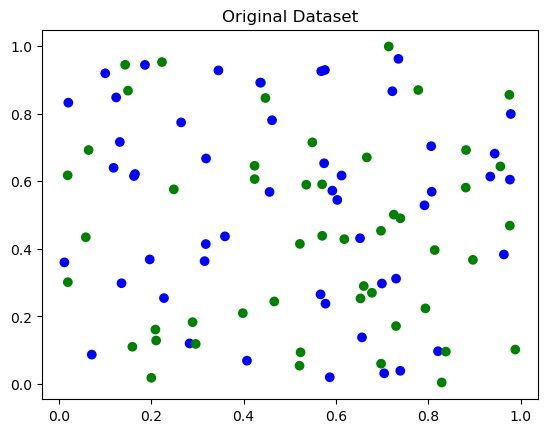

In [3]:
# Sampling random hypothesis to get centers and labels
h = sample_from_pH(nsamples=100)
centers, labels = h
labelcolors = ['green' if not label else 'blue' for label in labels]
plt.scatter(centers[:,0],centers[:,1],c=labelcolors)
plt.title('Original Dataset')

## Custom k-NN Classifier

In [ ]:
# kNN code
def compute_kNN(x,centers,labels,v):
    """ Calculate the output of a k-NN classifier for a given input point and training set"""
    distances = np.linalg.norm(x - centers, axis=1)
    k_nearest_idx = np.argpartition(distances, v)[:v]
    nearest_labels = labels[k_nearest_idx].tolist()
    # Predicts the label by majority vote among neighbors.
    label = max(set(nearest_labels),key = nearest_labels.count)
    
    #np.bincount(labels[k_nearest_idx]).argmax() #TODO check corner case
    # if np.sum(nearest_labels) > v/2:
    #     label= 1
    # elif np.sum(nearest_labels) < v/2:
    #     label= 0
    # else:
    #     label= np.random.choice([0,1], nsamples)  # the undefined case
    return label

### Plot decision boundaries

In [5]:
# Creating meshgrid for plotting decision boundaries
x_min, x_max = 0,1
y_min, y_max = 0,1
h = .01  # step size
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
Z = []
for x in np.c_[xx.ravel(), yy.ravel()]:
    Z.append(compute_kNN(x,centers,labels,v=3))

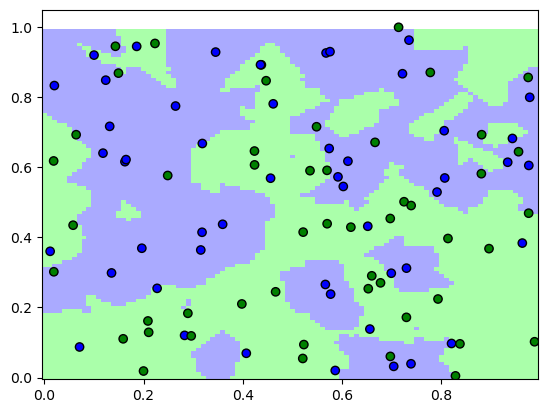

In [6]:
# Visualizing hypothesis 
Z = np.array(Z)
Z = Z.reshape(xx.shape)
plt.figure()
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAFFAA', '#AAAAFF'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
plt.scatter(centers[:,0],centers[:,1],c=labelcolors, edgecolors='k')
plt.show()

## Experimental Protocol A

For each k ∈ {1, . . . , 49}

Do 100 runs ...

Sample a h from pH
Build a k- NN model with 4000 training points sampled from ph(x, y).
Run k- NN estimate generalisation error ( for this run ) using 1000 test points sampled from ph(x, y)

The estimated generalisation error (y-axis) is then the mean of these 100 "run" generalisation errors.

In [7]:
# Function to generating noisy data from distribution
def sample_from_ph_xy(nsamples,h_set):
    centers,labels = h_set
    xvals = np.random.uniform(0.0, 1.0, size = (nsamples,2))
    yvals = []
    for x in xvals:
        # Simulating cointoss
        cointoss = np.random.choice([0,1], p=[0.2,0.8])
        if cointoss==1:
            y = compute_kNN(x,centers,labels,v=3)
        else:
            y = np.random.choice([0,1])
        yvals.append(y)
    yvals = np.array(yvals)
    return xvals, yvals  #np.column_stack((xvals, yvals))

In [8]:
# generalisation error calculation
def compute_misclassification_rate(y_true, y_pred):
    return np.mean(y_pred != y_true) 

In [12]:
# Implementing Protocol A - estimated generalisation error of k-NN as a function of k

# dictionary to hold error in every run for each k
all_errors_per_k = {}
for k in range(1,50):  
    all_errors_per_k[k] = []

for run_idx in range(100):
    print(f'run index: {run_idx}/100')
    # create train and test datasets
    h = sample_from_pH(nsamples=100)
    training_setX,training_setY = sample_from_ph_xy(nsamples=4000,h_set = h)
    test_setX,test_setY = sample_from_ph_xy(nsamples=1000,h_set = h)

    for k in range(1,50): #iterating over number of neighbours
        test_preds = []
        for testpoint in test_setX:
            # get predictions from kNN model
            predicted_label = compute_kNN(testpoint,training_setX,training_setY,v=k)
            test_preds.append(predicted_label)
        test_error = compute_misclassification_rate(test_setY,test_preds)
        print(f'run: {run_idx}/100, k={k}, test_error = {test_error}')
        all_errors_per_k[k].append(test_error)

# estimated error for each k = mean of error for each run for that k
avg_generalisation_errors_k = []
k_values = np.arange(1,50)
for k in k_values:  
    avg_generalisation_errors_k.append(np.average(all_errors_per_k[k]))

run index: 0/100
run: 0/100, k=1, test_error = 0.187
run: 0/100, k=2, test_error = 0.186
run: 0/100, k=3, test_error = 0.147
run: 0/100, k=4, test_error = 0.158
run: 0/100, k=5, test_error = 0.134
run: 0/100, k=6, test_error = 0.146
run: 0/100, k=7, test_error = 0.143
run: 0/100, k=8, test_error = 0.143
run: 0/100, k=9, test_error = 0.138
run: 0/100, k=10, test_error = 0.141
run: 0/100, k=11, test_error = 0.13
run: 0/100, k=12, test_error = 0.134
run: 0/100, k=13, test_error = 0.134
run: 0/100, k=14, test_error = 0.15
run: 0/100, k=15, test_error = 0.147
run: 0/100, k=16, test_error = 0.151
run: 0/100, k=17, test_error = 0.15
run: 0/100, k=18, test_error = 0.153
run: 0/100, k=19, test_error = 0.143
run: 0/100, k=20, test_error = 0.147
run: 0/100, k=21, test_error = 0.145
run: 0/100, k=22, test_error = 0.145
run: 0/100, k=23, test_error = 0.148
run: 0/100, k=24, test_error = 0.149
run: 0/100, k=25, test_error = 0.149
run: 0/100, k=26, test_error = 0.149
run: 0/100, k=27, test_error = 0.

Text(0.5, 1.0, 'Mean Generalisation Error for each k')

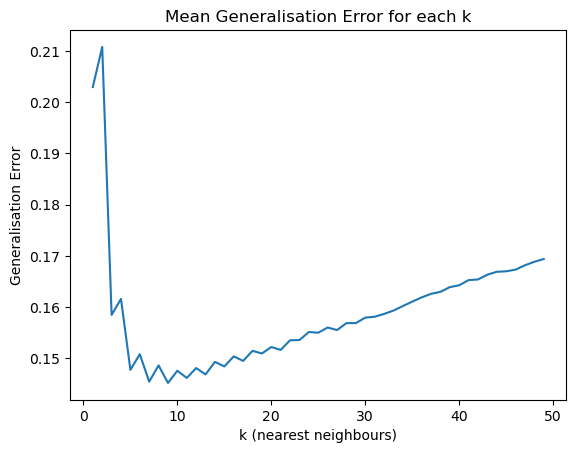

In [13]:
# Plotting k vs generalisation error
plt.plot(k_values,avg_generalisation_errors_k)
plt.xlabel('k (nearest neighbours)')
plt.ylabel('Generalisation Error')
plt.title('Mean Generalisation Error for each k')

### Experimental Protocol B

For each m ∈ {100, 500, 1000, 1500, . . . , 4000}
- Do 100 runs ...
-   -   For each k ∈ {1, . . . , 49}
-   -   -   Sample a h from pH
-   -   -   Build a k- NN model with m training points sampled from ph(x, y).
-   -   -   Run k- NN estimate generalisation error ( for this run )using 1000 test points sampled from ph(x, y)
-   -   -   The estimated optimal k ( for this run ) is then the k with minimal estimated generalisation error .
- The estimated optimal k (y - axis ) is then the mean
of these 100 ‘‘ run ’ ’ optimal ‘k’s 

In [9]:
# setting number of training points to iterate over
m_values = np.arange(500,4001,500) 
m_values = np.insert(m_values,0,100)
print(m_values)

[ 100  500 1000 1500 2000 2500 3000 3500 4000]


In [10]:
# Implementing Protocol B

optimal_ks = []

for m in m_values: #iterating over training points
    print(f'm training points: {m}') 
    optimal_ks_per_m = []

    for run_idx in range(100): 
        print(f'run index: {run_idx}/100')
        # create train and test datasets
        h = sample_from_pH(nsamples=100)
        training_setX,training_setY = sample_from_ph_xy(nsamples=m,h_set = h)
        test_setX,test_setY = sample_from_ph_xy(nsamples=1000,h_set = h)

        optimal_k = None
        min_error = np.inf
        for k in range(1,50): #iterating over number of neighbours
            test_preds = []
            for testpoint in test_setX:
                predicted_label = compute_kNN(testpoint,training_setX,training_setY,v=k)
                test_preds.append(predicted_label)

            test_error = compute_misclassification_rate(test_setY,test_preds)
            print(f'm:{m}, run:{run_idx}, k={k}, test_error = {test_error}')

            # Choosing optimal k : which has minimal estimated generalisation error for current run
            if test_error < min_error:
                min_error = test_error
                optimal_k = k
            
        optimal_ks_per_m.append(optimal_k)

    print(optimal_ks_per_m)
    # Choosing optimal k : average optimal k over all runs
    mean_optimal_k = np.mean(optimal_ks_per_m)
    optimal_ks.append(mean_optimal_k)
    print(f"Optimal k of m={m}: {mean_optimal_k}")

m training points: 100
run index: 0/100
m:100, run:0, k=1, test_error = 0.238
m:100, run:0, k=2, test_error = 0.261
m:100, run:0, k=3, test_error = 0.248
m:100, run:0, k=4, test_error = 0.283
m:100, run:0, k=5, test_error = 0.277
m:100, run:0, k=6, test_error = 0.282
m:100, run:0, k=7, test_error = 0.289
m:100, run:0, k=8, test_error = 0.298
m:100, run:0, k=9, test_error = 0.297
m:100, run:0, k=10, test_error = 0.31
m:100, run:0, k=11, test_error = 0.312
m:100, run:0, k=12, test_error = 0.31
m:100, run:0, k=13, test_error = 0.31
m:100, run:0, k=14, test_error = 0.308
m:100, run:0, k=15, test_error = 0.316
m:100, run:0, k=16, test_error = 0.334
m:100, run:0, k=17, test_error = 0.327
m:100, run:0, k=18, test_error = 0.344
m:100, run:0, k=19, test_error = 0.338
m:100, run:0, k=20, test_error = 0.374
m:100, run:0, k=21, test_error = 0.379
m:100, run:0, k=22, test_error = 0.365
m:100, run:0, k=23, test_error = 0.392
m:100, run:0, k=24, test_error = 0.374
m:100, run:0, k=25, test_error = 0.4

Text(0.5, 1.0, 'm vs optimal k')

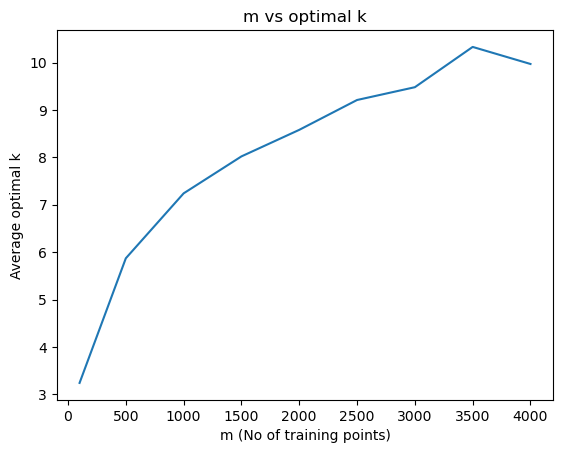

In [11]:
# Plotting m vs k
plt.plot(m_values, optimal_ks)
plt.xlabel('m (No of training points)')
plt.ylabel('Average optimal k')
plt.title('m vs optimal k')
# plt.ylim((1,49))